# FINANCIAL FOR FRAUD DETECTION DATSET

**Import Pandas**

In [1]:
import pandas as pd

**Import CSV Dataset**

In [2]:
#dataset link - https://www.kaggle.com/datasets/ealaxi/paysim1
data = pd.read_csv('credit_card.csv')

**Rename the coloumn name and Display Data upto 60 rows**

In [3]:
data.rename({'step': 'Hour of time', 'type':'Mode of transaction', 'amount':'Transaction amount', 'nameOrig':'Source_id', 'oldbalanceOrg':'Source_Intial_Balance','newbalanceOrig':'Source_Remaining_Balance','nameDest':'Recipient ID','oldbalanceDest':'Recipient Inital Balance', 'newbalanceDest':'Recipient New Balance', 'isFraud':'Fraudulent Transaction', 'isFlaggedFraud':'Flagged Fraud Attempt'}, axis = 1, inplace = True)
data.head(60)

,Hour of time,Mode of transaction,Transaction amount,Source_id,Source_Intial_Balance,Source_Remaining_Balance,Recipient ID,Recipient Inital Balance,Recipient New Balance,Fraudulent Transaction,Flagged Fraud Attempt
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


**Check if any null values present in any coloumns**

In [4]:
data.isnull().any()

Hour of time                False
Mode of transaction         False
Transaction amount          False
Source_id                   False
Source_Intial_Balance       False
Source_Remaining_Balance    False
Recipient ID                False
Recipient Inital Balance    False
Recipient New Balance       False
Fraudulent Transaction      False
Flagged Fraud Attempt       False
dtype: bool

## STATISTICS

**stats 1: transaction are fraud but not flagged fraud**

In [5]:
fragged_not_flagged = data[(data['Fraudulent Transaction']==1) & (data['Flagged Fraud Attempt']==0)]

In [6]:
print(fragged_not_flagged.head())

     Hour of time Mode of transaction  Transaction amount    Source_id  \
2               1            TRANSFER               181.0  C1305486145   
3               1            CASH_OUT               181.0   C840083671   
251             1            TRANSFER              2806.0  C1420196421   
252             1            CASH_OUT              2806.0  C2101527076   
680             1            TRANSFER             20128.0   C137533655   

     Source_Intial_Balance  Source_Remaining_Balance Recipient ID  \
2                    181.0                       0.0   C553264065   
3                    181.0                       0.0    C38997010   
251                 2806.0                       0.0   C972765878   
252                 2806.0                       0.0  C1007251739   
680                20128.0                       0.0  C1848415041   

     Recipient Inital Balance  Recipient New Balance  Fraudulent Transaction  \
2                         0.0                    0.0        

**If Fraudulent Transaction is true then what is the Source Intial Balance and Source Remaining Balance?**

**stats 2: Simple statistics over fraudulent transaction**

In [7]:
transaction_amt = data['Transaction amount'][data['Fraudulent Transaction'] == 1]
transaction_amt.describe().apply("{0:.5f}".format)

count        1142.00000
mean      1192628.93208
std       2030598.96376
min           119.00000
25%         86070.17000
50%        353179.45000
75%       1248759.00250
max      10000000.00000
Name: Transaction amount, dtype: object

**stats 3: Most fraud happened in which type**

In [8]:
fraud_trans_data = data.loc[data['Fraudulent Transaction'] == 1, 'Mode of transaction']
print(fraud_trans_data)
dict1 = {}
for idx, row in fraud_trans_data.items():
    
    if row not in dict1:
        dict1[row] = 1
    else:
        dict1[row] += 1
max_fraud_method = max(dict1, key=dict1.get)
print("The maximum frauds were of type {} and total number was {}".format(max_fraud_method, dict1[max_fraud_method]))

2          TRANSFER
3          CASH_OUT
251        TRANSFER
252        CASH_OUT
680        TRANSFER
             ...   
1047888    CASH_OUT
1048221    TRANSFER
1048222    CASH_OUT
1048323    TRANSFER
1048324    CASH_OUT
Name: Mode of transaction, Length: 1142, dtype: object
The maximum frauds were of type CASH_OUT and total number was 578


**stats 4: Average fraud amount**

In [11]:
data.loc[data['Fraudulent Transaction'] == 1, 'Transaction amount'].mean()

1192628.9320753065

**stats 5: Percentage of Frauds done**

In [12]:
number_of_frauds_done = data['Fraudulent Transaction'].sum()
number_of_transactions = data['Fraudulent Transaction'].count()
percentage = (round((number_of_frauds_done/number_of_transactions)*100, 3))
print("{} %".format(percentage))

0.109 %


# HISTOGRAM

**Histogram : Victims of Fraudulent Transactions**

Note: Ranges are 50% to 75% of Transaction Amount

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Fraudulent Transactions')

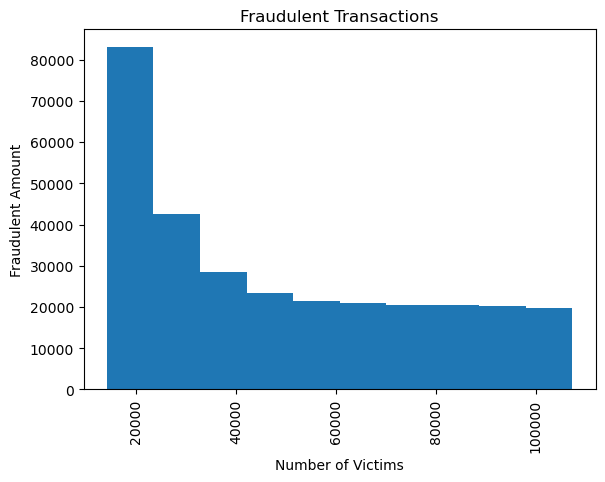

In [15]:
histogram = data.hist(column = 'Transaction amount', by = data['Fraudulent Transaction'] == '1', range=[14200, 107315], bins = 10)
plt.xlabel('Number of Victims')
plt.ylabel('Fraudulent Amount')
plt.title('Fraudulent Transactions')

Text(0.5, 1.0, 'Number of Fraud Transactions per Mode')

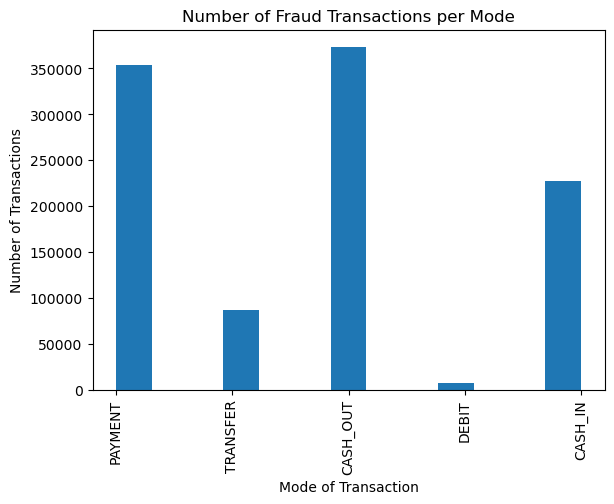

In [17]:
histogram = data.hist(column = 'Mode of transaction', by = data['Fraudulent Transaction'] == '1', bins = 13)
plt.xlabel('Mode of Transaction')
plt.ylabel('Number of Transactions')
plt.title('Number of Fraud Transactions per Mode')